<a href="https://colab.research.google.com/github/paulo-generozo/paulo-generozo/blob/main/DOEN%C3%87A_RENAL_CRONICA_MULTI_MODELAGEM_ATRAVES_DE_CFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Doenças Renais
**Técnica CFIS (adaptado ao CRISP-DM)**

## 1. Compreensão do Negócio
Neste estudo, o objetivo é desenvolver um modelo preditivo para diagnosticar doenças renais com base em diversas características clínicas. A técnica CFIS (Compreensão, Filtragem, Investigação, Seleção) foi adaptada ao framework CRISP-DM.

## 2. Filtragem e Limpeza dos Dados

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Carregar o dataset
df = pd.read_csv('kidney_disease_dataset.csv')
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [ ]:
# Tratar valores ausentes
imputer = SimpleImputer(strategy='median')
df_num = df.select_dtypes(include=[np.number])
df_num = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)
df_cat = df.select_dtypes(include=['object']).fillna('missing')


# Encoder para categóricas
le = LabelEncoder()
for col in df_cat.columns:
    df_cat[col] = le.fit_transform(df_cat[col])


# Reconstruir
df_clean = pd.concat([df_num, df_cat], axis=1)
df_clean.shape

(20538, 43)

## 3. Investigação Exploratória e Engenharia de Atributos

In [ ]:
# Estatísticas descritivas e correlação
print(df_clean.describe())
corr = df_clean.corr()['Target'].abs().sort_values(ascending=False)
corr.head(10)

       Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
count        20538.000000            20538.000000               20538.000000   
mean            47.477895              130.352079                   1.015041   
std             24.941947               29.063838                   0.005793   
min              5.000000               80.000000                   1.005000   
25%             26.000000              105.000000                   1.010000   
50%             47.000000              131.000000                   1.015000   
75%             69.000000              156.000000                   1.020000   
max             90.000000              180.000000                   1.025000   

       Albumin in urine  Sugar in urine  Random blood glucose level (mg/dl)  \
count      20538.000000    20538.000000                        20538.000000   
mean           2.501266        2.494595                          284.630295   
std            1.697084        1.701059   

,Target
Target,1.000000
Pus cells in urine,0.026725
Appetite (good/poor),0.019508
Specific gravity of urine,0.014126
Estimated Glomerular Filtration Rate (eGFR),0.012936
Pedal edema (yes/no),0.012895
Age of the patient,0.011191
Albumin in urine,0.010981
Red blood cells in urine,0.009634
Hypertension (yes/no),0.009548


In [ ]:
# Definir X e y
X = df_clean.drop('Target', axis=1)
y = df_clean['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Seleção e Avaliação de Modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score
)
import pandas as pd

# 1. Escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, max_iter=5000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(max_iter=5000)
}

results = []
for name, model in models.items():
    # usar dados escalados para TODOS (tree-based não sofre com escala, mas não prejudica)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # probabilidade só se disponível
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.802175,0.643484,0.802175,0.714120
1,Random Forest,0.802175,0.643484,0.802175,0.714120
3,SVM,0.802175,0.643484,0.802175,0.714120
4,XGBoost,0.801363,0.643564,0.801363,0.713847
2,KNN,0.772152,0.652349,0.772152,0.704448
5,MLP,0.696852,0.655380,0.696852,0.675035


## 5. Visualização Comparativa de Modelos

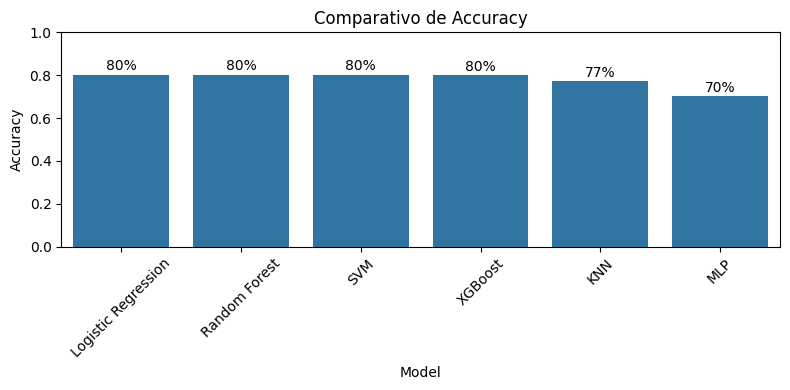

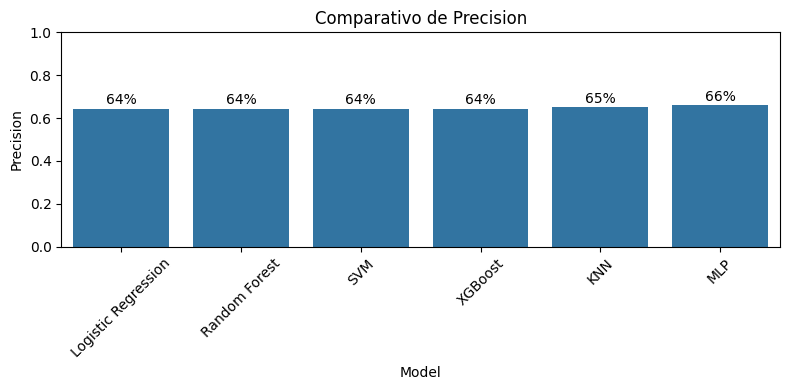

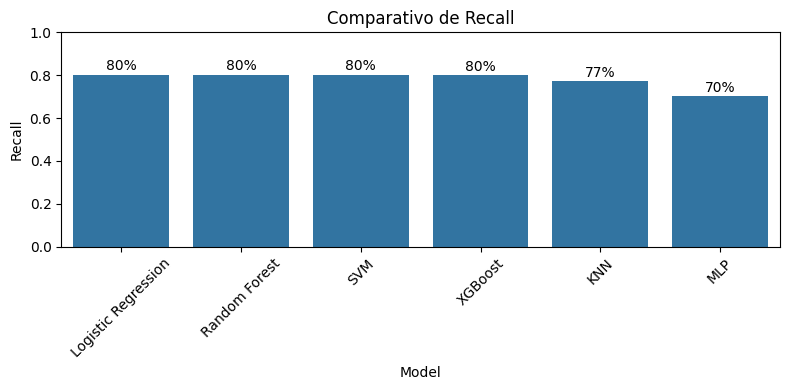

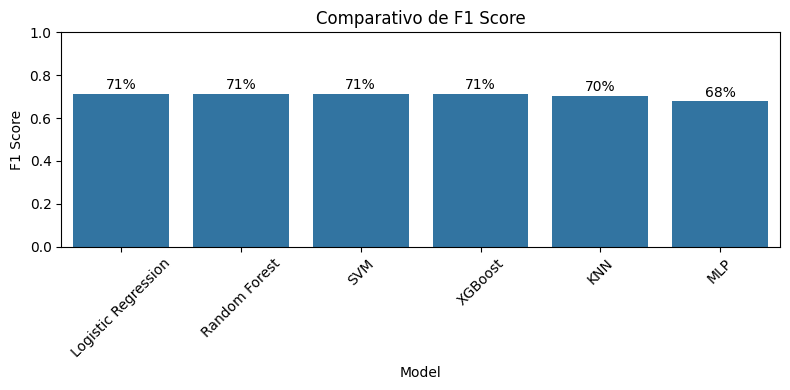

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plt.figure(figsize=(8,4))
    # Assign the plot's axes to the variable 'ax'
    ax = sns.barplot(x="Model", y=metric, data=results_df)
    plt.title(f"Comparativo de {metric}")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()

    # Adicionando a porcentagem em cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02,
                '{:.0%}'.format(height), ha="center")

    plt.show()

## 6. Importância das Features

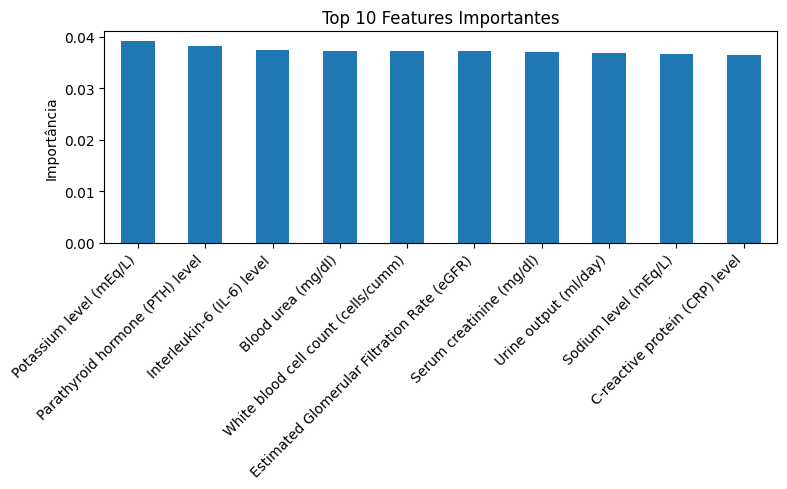

In [ ]:
# Usar Random Forest para importância de features
rf = models['Random Forest']
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(8,5))
feat_importances.plot(kind='bar')
plt.title('Top 10 Features Importantes')
plt.ylabel('Importância')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

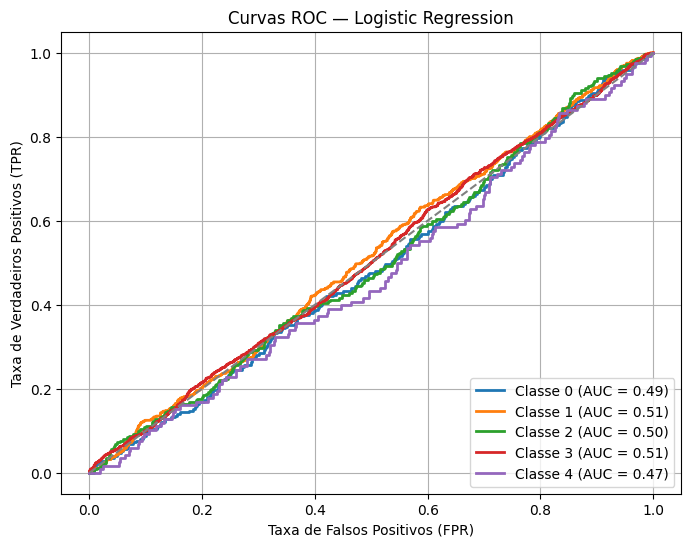

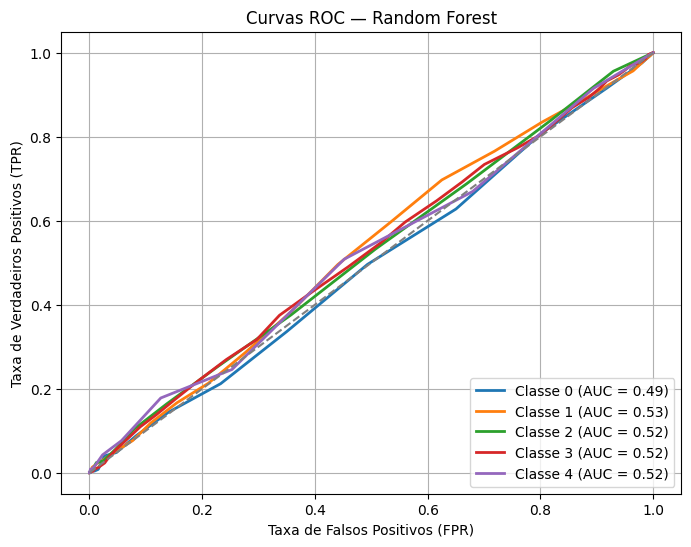

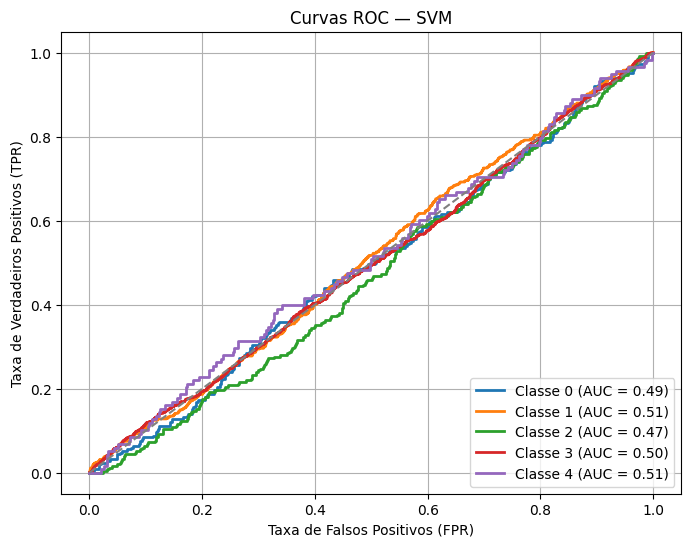

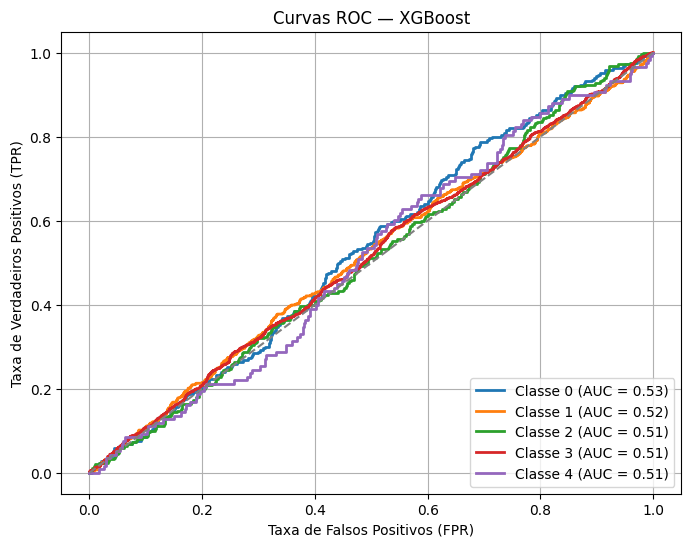

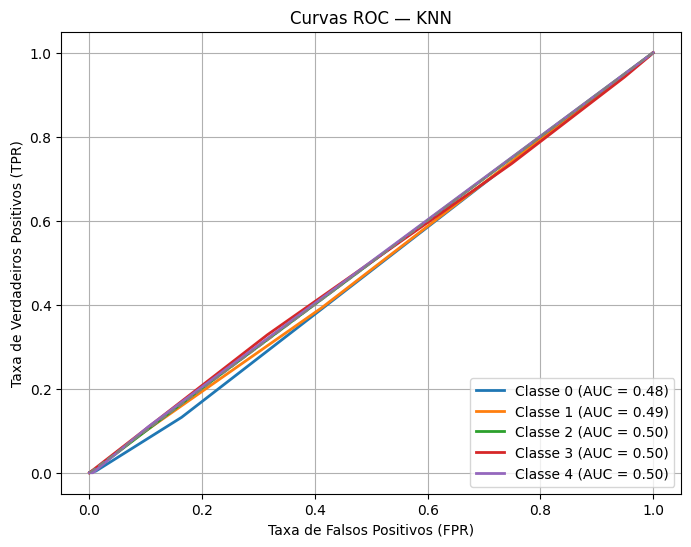

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 1. Defina as classes presentes em y_test
classes = np.unique(y_test)

# 2. Binarize y_test: shape (n_samples, n_classes)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# 3. Para cada modelo, obtenha as probabilidades de todas as classes
for nome, modelo in modelos.items():
    # predict_proba retorna array (n_samples, n_classes)
    y_score = modelo.predict_proba(X_test_scaled)

    # 4. Plote uma curva ROC por classe
    plt.figure(figsize=(8,6))
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Classe {cls} (AUC = {roc_auc:.2f})')

    # 5. (Opcional) Curva “azar” de referência
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    plt.title(f'Curvas ROC — {nome}')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



=== Avaliando Logistic Regression ===


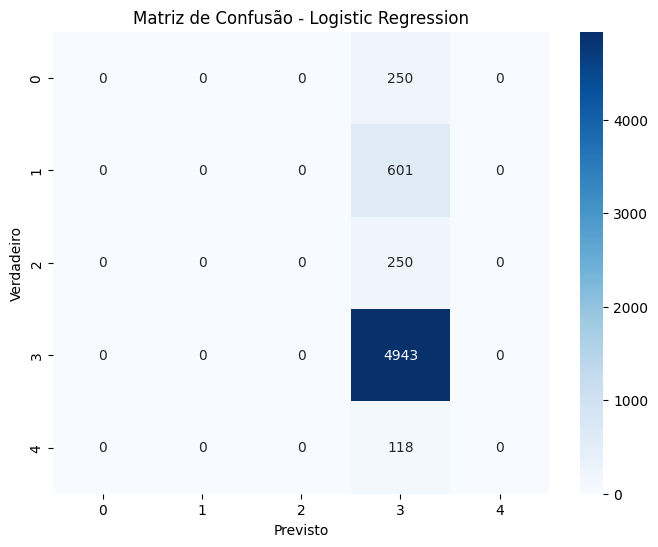


=== Avaliando Random Forest ===


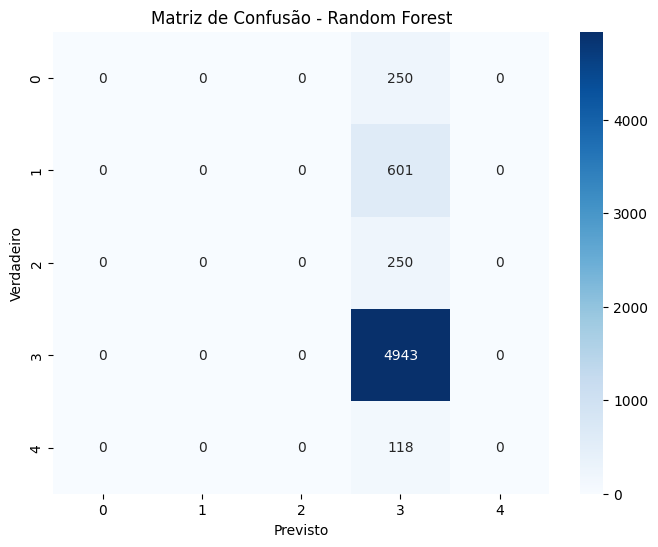


=== Avaliando SVM ===


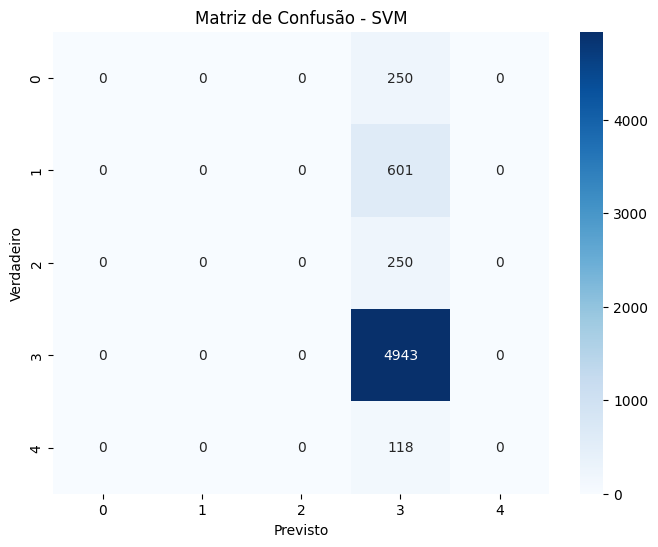


=== Avaliando XGBoost ===


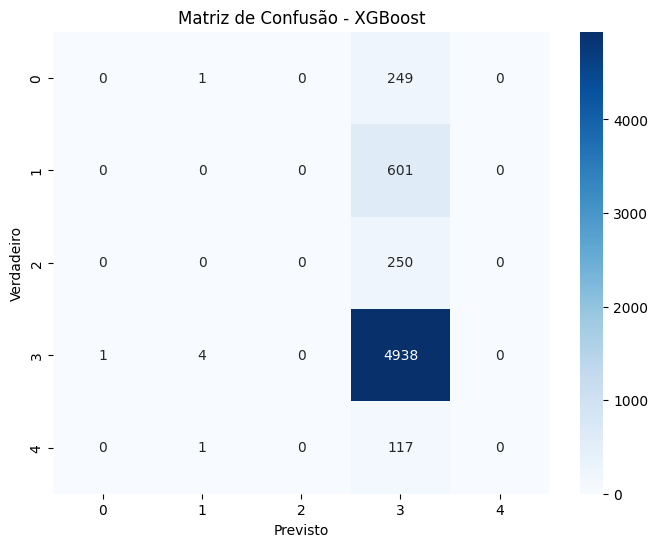


=== Avaliando KNN ===


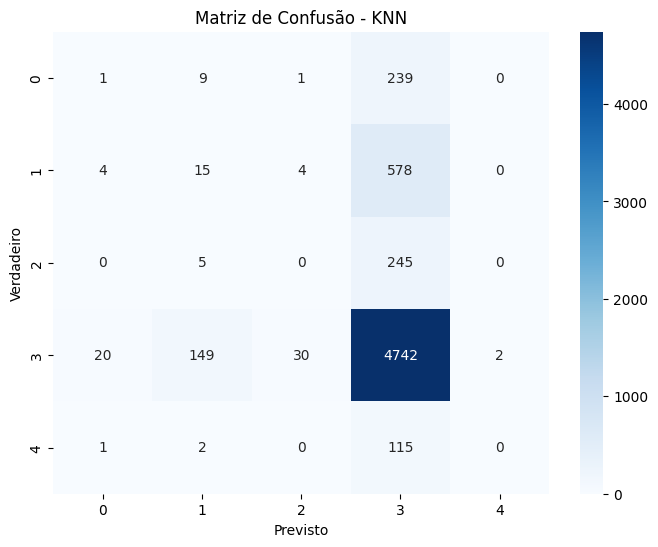

Acurácia: 0.7722


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.04      0.00      0.01       250
           1       0.08      0.02      0.04       601
           2       0.00      0.00      0.00       250
           3       0.80      0.96      0.87      4943
           4       0.00      0.00      0.00       118

    accuracy                           0.77      6162
   macro avg       0.18      0.20      0.18      6162
weighted avg       0.65      0.77      0.70      6162



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definir os modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True, max_iter=5000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier()
}

# Obter os nomes das classes
classes = np.unique(y_test)

# Treinar e avaliar cada modelo
for nome, modelo in modelos.items():
    print(f"\n=== Avaliando {nome} ===")

    # Treinar o modelo
    modelo.fit(X_train_scaled, y_train)

    # Fazer previsões
    y_pred = modelo.predict(X_test_scaled)

    # 1. Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()



# Obter os nomes das classes como strings (não usado no momento)
classes_names = {
     0: "Classe 0",
     1: "Classe 1",
     2: "Classe 2",
     3: "Classe 3",
     4: "Classe 4"
 }

# 3. Acurácia (opcional) - Movido para fora do loop
accuracy = modelo.score(X_test_scaled, y_test) # Agora está no mesmo nível de indentação que o loop 'for'
print(f"Acurácia: {accuracy:.4f}\n")

# 2. Relatório de Classificação
# 2. Identifique as classes únicas em y_test
classes = np.unique(y_test)            # ex.: array([0,1,2])

# 3. Converta-as para strings (para target_names)
class_names = [str(c) for c in classes]  # ex.: ['0','1','2']

# 4. Imprima o relatório
print("\nRelatório de Classificação:")
print(classification_report(
    y_true=y_test,
    y_pred=y_pred,
    labels=classes,
    target_names=class_names
))

## Conclusão
Comparando os modelos avaliados, observamos qual apresentou melhor combinação de acurácia e AUC. As features mais importantes para o diagnóstico foram destacadas acima, permitindo insights clínicos sobre quais variáveis têm maior impacto na predição de doença renal.